# House Prices - Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit


## Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

주택 구입자에게 꿈의 집을 설명해달라고 요청하면 지하 천장 높이나 East-West Railload(동서철도) 근접성으로 시작하진 않을 것입니다.
그러나 이 대회의 데이터셋은 침실 수. while-picket pence 보다 가격 협상에 훨씬 더 많은 영향을 미친 다는 것을 증명합니다.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

주 Ames, Iowa 에 있는 주거용 주택의 거의 모든 측면을 설명하는 70개의 설명 변수가 있는 데이터셋을로 각 주택의 최종 가격을 예측해야합니다. 

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('./data/train.csv')

In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Column

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### MSSubClass

Identifies the type of dwelling involved in the sale.  
  
판매에 관여하는 주택 안 구조를 식별


    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES


<AxesSubplot:>

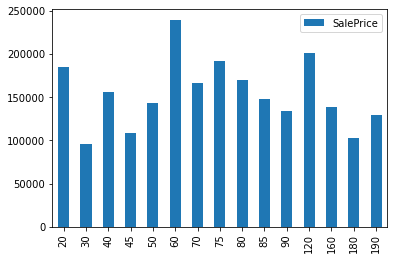

In [34]:
grouped = train.groupby(['MSSubClass'])
df = pd.DataFrame()

for key, frame in grouped:
    df.loc[key, 'SalePrice'] = frame['SalePrice'].mean()
    
df.plot(kind='bar')

ex) 2-1/2 STORY ALL AGES

![2-1/2 STORY ALL AGES](https://i.pinimg.com/564x/44/5c/3d/445c3d0fe9d099f2955e8031642307cd.jpg)

### MSZoning

Identifies the general zoning classification of the sale.

판매의 일반 구역 분류를 식별합니다.

    A	Agriculture (농업 구역)
    C	Commercial (상업 구역)
    FV	Floating Village Residential (주거용 수상 마을)
    I	Industrial (산업[공업] 구역)
    RH	Residential High Density (인구 밀도가 높은 구역)
    RL	Residential Low Density (인구 밀도가 적은 구역)
    RP	Residential Low Density Park (인구 밀도가 적은 공원 구역)
    RM	Residential Medium Density (인구 밀도가 중간인 구역)


<AxesSubplot:>

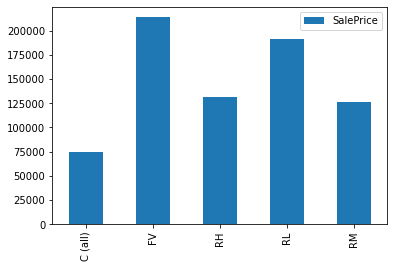

In [37]:
grouped = train.groupby(['MSZoning'])
df = pd.DataFrame()

for key, frame in grouped:
    df.loc[key, 'SalePrice'] = frame['SalePrice'].mean()
    
df.plot(kind='bar')

### LotFrontage

Linear feet of street connected to property

거주지에 연결되어 있는 거리의 직선 길이

### LotArea

Lot size in square feet

토지 크기(평방)

### Street
  
Type of road access to property

거주지로 들어갈때 지나가는 도로 바닥 유형

    Grvl	Gravel (자갈)
    Pave	Paved (포장도로, 아스팔트)


### Alley
  
Type of road access to property

거주지로 들어갈때 골목길 유형

    Grvl	Gravel (자갈)		
    Pave	Paved (포장도로, 아스팔트)		
    NA 	No alley access (없음)


### LotShape
  
General shape of property

토지 모양

    Reg	Regular	(정모양 ex: 정사각형)
    IR1	Slightly irregular (약간 불규칙)
    IR2	Moderately Irregular (보통 불규칙)
    IR3	Irregular (불규칙)


### LandContour

Flatness of the property

거주지의 평탄도

    Lvl	Near Flat/Level (거의 편평한 수준)												
    Bnk	Banked - Quick and significant rise from street grade to building (수평이 아닌 각도, 노면에서 건물까지 빠르고 현저한 상승)	
    HLS	Hillside - Significant slope from side to side (언덕-측면에서 측면으로의 상당한 경사)					
    Low	Depression (울퉁불퉁)														


### Utilities

Type of utilities available

사용 가능한 기능

    AllPub	All public Utilities (E,G,W,& S) (모두) 
    NoSewr	Electricity, Gas, and Water (Septic Tank) (전기, 가스, 물 (정화조))
    NoSeWa	Electricity and Gas Only (전기 및 가스)
    ELO	Electricity only (전기)
	

### LotConfig

Lot configuration

토지 형태

    Inside	Inside lot 
    Corner	Corner lot
    CulDSac	Cul-de-sac
    FR2	Frontage on 2 sides of property
    FR3	Frontage on 3 sides of property


### LandSlope

Slope of property

거주지의 경사정도

    Gtl	Gentle slope (완만한)
    Mod	Moderate Slope (경사짐)
    Sev	Severe Slope (극한) 



### Neighborhood

Physical locations within Ames city limits

Ames 도시 경계 내의 물리적 위치

    Blmngtn	Bloomington Heights
    Blueste	Bluestem
    BrDale	Briardale
    BrkSide	Brookside
    ClearCr	Clear Creek
    CollgCr	College Creek
    Crawfor	Crawford
    Edwards	Edwards
    Gilbert	Gilbert
    IDOTRR	Iowa DOT and Rail Road
    MeadowV	Meadow Village
    Mitchel	Mitchell
    Names	North Ames
    NoRidge	Northridge
    NPkVill	Northpark Villa
    NridgHt	Northridge Heights
    NWAmes	Northwest Ames
    OldTown	Old Town
    SWISU	South & West of Iowa State University
    Sawyer	Sawyer
    SawyerW	Sawyer West
    Somerst	Somerset
    StoneBr	Stone Brook
    Timber	Timberland
    Veenker	Veenker
 


### Condition1

Proximity to various conditions

근접해 있는 다양한 환경 조건

    Artery	Adjacent to arterial street (고속(간선) 도로와 인접)
    Feedr	Adjacent to feeder street (지선 도로와 인접)
    Norm	Normal	
    RRNn	Within 200' of North-South Railroad (남북 철도에서 200피트 이내)
    RRAn	Adjacent to North-South Railroad (남북 철도와 인접)
    PosN	Near positive off-site feature--park, greenbelt, etc. ( 공원, 그린벨트) 와 가까움
    PosA	Adjacent to positive off-site feature
    RRNe	Within 200' of East-West Railroad (동서 철도에서 200피트 이내)
    RRAe	Adjacent to East-West Railroad (동서 철도와 인접)

### Condition2

Proximity to various conditions (if more than one is present)

근접해 있는 다양한 환경 조건(2번째)

    Artery	Adjacent to arterial street (고속(간선) 도로와 인접)
    Feedr	Adjacent to feeder street (지선 도로와 인접)
    Norm	Normal	
    RRNn	Within 200' of North-South Railroad (남북 철도에서 200피트 이내)
    RRAn	Adjacent to North-South Railroad (남북 철도와 인접)
    PosN	Near positive off-site feature--park, greenbelt, etc. ( 공원, 그린벨트) 와 가까움
    PosA	Adjacent to positive off-site feature
    RRNe	Within 200' of East-West Railroad (동서 철도에서 200피트 이내)
    RRAe	Adjacent to East-West Railroad (동서 철도와 인접)

### BldgType

Type of dwelling

주거 유형

    1Fam	Single-family Detached (분리된 단일 가족)
    2FmCon	Two-family Conversion; originally built as one-family dwelling (두 가족 개종; 원래 1 가구 주택으로 지어졌습니다.)
    Duplx	Duplex (이중)
    TwnhsE	Townhouse End Unit
    TwnhsI	Townhouse Inside Unit

### HouseStyle

Style of dwelling

주거 스타일

    1Story	One story
    1.5Fin	One and one-half story: 2nd level finished
    1.5Unf	One and one-half story: 2nd level unfinished
    2Story	Two story
    2.5Fin	Two and one-half story: 2nd level finished
    2.5Unf	Two and one-half story: 2nd level unfinished
    SFoyer	Split Foyer
    SLvl	Split Level

### OverallQual

Rates the overall material and finish of the house

집 재료와 마무리 상태에 대한 평가

    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor

### OverallCond

Rates the overall material and finish of the house

집 상태에 대한 평가

    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor

### YearBuilt

Original construction date

건설 날짜

### YearRemodAdd

Remodel date (same as construction date if no remodeling or additions)

리모델링 날짜 (개조 또는 추가가없는 경우 시공 날짜와 동일)

### RoofMatl

Roof material

지붕 재료

    ClyTile	Clay or Tile (점토 또는 타일)
    CompShg	Standard (Composite) Shingle 
    Membran	Membrane
    Metal	Metal (금속)
    Roll	Roll
    Tar&Grv	Gravel & Tar (자갈 및 타르)
    WdShake	Wood Shakes
    WdShngl	Wood Shingles

### Exterior1st

Exterior covering on house

집 외부 덮개

    AsbShng	Asbestos Shingles
    AsphShn	Asphalt Shingles
    BrkComm	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    CemntBd	Cement Board
    HdBoard	Hard Board
    ImStucc	Imitation Stucco
    MetalSd	Metal Siding
    Other	Other
    Plywood	Plywood
    PreCast	PreCast	
    Stone	Stone
    Stucco	Stucco
    VinylSd	Vinyl Siding
    Wd Sdng	Wood Siding
    WdShing	Wood Shingles

### Exterior2nd

Exterior covering on house (if more than one material)

집 외부 덮개 (재료가 둘 이상인 경우)

    AsbShng	Asbestos Shingles
    AsphShn	Asphalt Shingles
    BrkComm	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    CemntBd	Cement Board
    HdBoard	Hard Board
    ImStucc	Imitation Stucco
    MetalSd	Metal Siding
    Other	Other
    Plywood	Plywood
    PreCast	PreCast	
    Stone	Stone
    Stucco	Stucco
    VinylSd	Vinyl Siding
    Wd Sdng	Wood Siding
    WdShing	Wood Shingles

### MasVnrType

Masonry veneer type

벽돌 겉지장 유형

    BrkCmn	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    None	None
    Stone	Stone

### MasVnrArea

Masonry veneer area in square feet (벽돌 겉지장 면적 (평방))

### ExterQual

Evaluates the quality of the material on the exterior

외부 재료의 품질 평가

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

### ExterCond

Evaluates the present condition of the material on the exterior

외부 재료의 상태 평가

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

### Foundation

Type of foundation

토대 유형

    BrkTil	Brick & Tile
    CBlock	Cinder Block (콘크리트 블록)
    PConc	Poured Contrete	(쏟아지는 콘크리트)
    Slab	Slab
    Stone	Stone
    Wood	Wood

### BsmtQual

Evaluates the height of the basement

지하실 높이 평가

    Ex	Excellent (100+ inches)	
    Gd	Good (90-99 inches)
    TA	Typical (80-89 inches)
    Fa	Fair (70-79 inches)
    Po	Poor (<70 inches
    NA	No Basement

### BsmtCond

Evaluates the height of the basement

지하실의 일반적인 상태 평가


    Ex	Excellent
    Gd	Good
    TA	Typical - slight dampness allowed
    Fa	Fair - dampness or some cracking or settling
    Po	Poor - Severe cracking, settling, or wetness
    NA	No Basement

### BsmtExposure

Refers to walkout or garden level walls

    Gd	Good Exposure
    Av	Average Exposure (split levels or foyers typically score average or above)	
    Mn	Mimimum Exposure
    No	No Exposure
    NA	No Basement

### BsmtFinType1

Rating of basement finished area

꾸며진 지하실 면적 등급

    GLQ	Good Living Quarters
    ALQ	Average Living Quarters
    BLQ	Below Average Living Quarters	
    Rec	Average Rec Room
    LwQ	Low Quality
    Unf	Unfinshed
    NA	No Basement

### BsmtFinSF1

Type 1 finished square feet

### BsmtFinType2

Rating of basement finished area (if multiple types)


지하실 마감 면적 등급 (여러 유형 인 경우)

    GLQ	Good Living Quarters
    ALQ	Average Living Quarters
    BLQ	Below Average Living Quarters	
    Rec	Average Rec Room
    LwQ	Low Quality
    Unf	Unfinshed
    NA	No Basement

### BsmtFinSF2

Type 2 finished square feet

### BsmtUnfSF

Unfinished square feet of basement area

### TotalBsmtSF

Total square feet of basement area

### Heating

Type of heating

난방 유형

    Floor	Floor Furnace (바닥 용광로)
    GasA	Gas forced warm air furnace
    GasW	Gas hot water or steam heat
    Grav	Gravity furnace	
    OthW	Hot water or steam heat other than gas
    Wall	Wall furnace

### HeatingQC

Heating quality and condition

난방 품질 및 상태

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor

### CentralAir

Central air conditioning

중앙 에어퀀

    N	No
    Y	Yes

### Electrical

Electrical system

전기 시스템

    SBrkr	Standard Circuit Breakers & Romex
    FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
    FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
    FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
    Mix	Mixed

### 1stFlrSF

First Floor square feet

### 2ndFlrSF

Second floor square feet

### LowQualFinSF

Low quality finished square feet (all floors)

### GrLivArea

Above grade (ground) living area square feet

### BsmtFullBath

Basement full bathrooms

### BsmtHalfBath

Basement half bathrooms

### FullBath

Full bathrooms above grade

### HalfBath

Half baths above grade

### Kitchen

Kitchens above grade

### KitchenQual

Kitchen quality

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor

### TotRmsAbvGrd

Total rooms above grade (does not include bathrooms)

### Functional

Home functionality (Assume typical unless deductions are warranted)

홈 기능 (공제가 보장되지 않는 한 일반적인 가정)



### Fireplaces

Number of fireplaces

벽난로 수

### FireplaceQu

Fireplace quality


    Ex	Excellent - Exceptional Masonry Fireplace
    Gd	Good - Masonry Fireplace in main level
    TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    Fa	Fair - Prefabricated Fireplace in basement
    Po	Poor - Ben Franklin Stove
    NA	No Fireplace

### GarageType

Garage location

차고 위치

    2Types	More than one type of garage
    Attchd	Attached to home
    Basment	Basement Garage
    BuiltIn	Built-In (Garage part of house - typically has room above garage)
    CarPort	Car Port
    Detchd	Detached from home
    NA	No Garage

### GarageYrBlt

Year garage was built

차고 건설 연도

### GarageFinish

Interior finish of the garage

차고 인테리어 완성도

    Fin	Finished
    RFn	Rough Finished	
    Unf	Unfinished
    NA	No Garage

### GarageCars

Size of garage in car capacity

차고 크기 (차량 수용정도)

### GarageArea

Size of garage in square feet

차고 크기 (평방 피트)

### GarageQual

Garage quality

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    NA	No Garage

### GarageCond

Garage condition

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor
    NA	No Garage

### PavedDrive

Paved driveway

포장된 진입로

    Y	Paved 
    P	Partial Pavement
    N	Dirt/Gravel

### WoodDeckSF

Wood deck area in square feet

### OpenPorchSF

Open porch area in square feet

### EnclosedPorch

Enclosed porch area in square feet

### 3SsnPorch

Three season porch area in square feet

### ScreenPorch

Screen porch area in square feet

### PoolArea

Pool area in square feet

### PoolQC

Pool quality

수영장 품질

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    NA	No Pool

### Fence

Fence quality

    GdPrv	Good Privacy
    MnPrv	Minimum Privacy
    GdWo	Good Wood
    MnWw	Minimum Wood/Wire
    NA	No Fence

### MiscFeature

Miscellaneous feature not covered in other categories

다른 카테고리에서 다루지 않는 기타 기능

    Elev	Elevator
    Gar2	2nd Garage (if not described in garage section)
    Othr	Other
    Shed	Shed (over 100 SF)
    TenC	Tennis Court
    NA	None

### MiscVal

$ 기타 기능의 가치

### MoSold

Month Sold (MM)

### YrSold

Year Sold (YYYY)

### SaleType

Type of sale

판매 유형

    WD 	Warranty Deed - Conventional
    CWD	Warranty Deed - Cash
    VWD	Warranty Deed - VA Loan
    New	Home just constructed and sold
    COD	Court Officer Deed/Estate
    Con	Contract 15% Down payment regular terms
    ConLw	Contract Low Down payment and low interest
    ConLI	Contract Low Interest
    ConLD	Contract Low Down
    Oth	Other

### SaleCondition

Condition of sale

판매 상태

    Normal	Normal Sale
    Abnorml	Abnormal Sale -  trade, foreclosure, short sale
    AdjLand	Adjoining Land Purchase
    Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
    Family	Sale between family members
    Partial	Home was not completed when last assessed (associated with New Homes)